In [124]:
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [125]:
df_train=pd.read_excel("/home/revathy/Downloads/Flight_Ticket_Participant_Datasets/Data_Train.xlsx")
df_test=pd.read_excel("/home/revathy/Downloads/Flight_Ticket_Participant_Datasets/Test_set.xlsx")

In [126]:
df=pd.concat([df_train,df_test])

In [127]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [128]:
df.shape

(13354, 11)

In [129]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [130]:
df.info()
#there are 9 object type is there

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


In [131]:
#check null values
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [132]:
#fill price null values
df["Price"]=df["Price"].fillna(df["Price"].mean())

In [133]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [134]:
#neglect other null values since it has very less percentage of null values
#lets find values for each columns
df["Airline"].value_counts()

Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

In [135]:
df["Date_of_Journey"].value_counts()

18/05/2019    633
6/06/2019     630
9/05/2019     628
12/06/2019    628
21/05/2019    615
9/06/2019     614
21/03/2019    516
15/05/2019    511
27/05/2019    447
24/06/2019    436
15/06/2019    433
1/06/2019     430
27/06/2019    430
3/06/2019     425
6/03/2019     405
24/03/2019    401
27/03/2019    364
24/05/2019    357
6/05/2019     355
1/05/2019     339
1/04/2019     335
12/05/2019    327
3/03/2019     280
9/03/2019     255
18/03/2019    197
15/03/2019    195
01/03/2019    186
12/03/2019    185
9/04/2019     149
3/04/2019     138
21/06/2019    133
18/06/2019    127
03/03/2019    123
09/03/2019    123
06/03/2019    123
3/05/2019     117
6/04/2019     114
24/04/2019    113
15/04/2019    112
27/04/2019    109
21/04/2019    104
18/04/2019     79
12/04/2019     74
1/03/2019      59
Name: Date_of_Journey, dtype: int64

In [136]:
df["Source"].value_counts()

Delhi       5682
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: Source, dtype: int64

In [137]:
df.Route.value_counts()

DEL → BOM → COK                3000
BLR → DEL                      1941
CCU → BOM → BLR                1232
CCU → BLR                       896
BOM → HYD                       785
                               ... 
BOM → JLR → HYD                   1
BOM → NDC → HYD                   1
BOM → COK → MAA → HYD             1
BOM → JDH → JAI → DEL → HYD       1
BOM → IXC → DEL → HYD             1
Name: Route, Length: 132, dtype: int64

In [138]:
df.Dep_Time.value_counts()

18:55    288
17:00    275
10:00    265
07:05    240
07:10    239
        ... 
22:25      1
12:05      1
21:40      1
03:00      1
22:30      1
Name: Dep_Time, Length: 223, dtype: int64

In [139]:
df.Destination.value_counts()

Cochin       5682
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64

In [140]:
df.Arrival_Time.value_counts()

19:00           536
21:00           466
19:15           434
16:10           185
12:35           159
               ... 
13:15 22 May      1
08:50 07 Mar      1
06:50 28 Apr      1
00:25 22 Jun      1
07:45 13 May      1
Name: Arrival_Time, Length: 1451, dtype: int64

In [141]:
df.Duration.value_counts()

2h 50m     672
1h 30m     493
2h 45m     432
2h 55m     418
2h 35m     399
          ... 
29h 10m      1
32h 55m      1
31h 30m      1
35h 20m      1
32h 25m      1
Name: Duration, Length: 374, dtype: int64

In [142]:
df.Total_Stops.value_counts()

1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

In [143]:
df.Additional_Info.value_counts()

No info                         10493
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
1 Short layover                     1
Red-eye flight                      1
2 Long layover                      1
Name: Additional_Info, dtype: int64

In [144]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [145]:
#Remove unwanted columns in the dataset
#In additional_info there is no information column is maximum
#arrival time ans dep_time ,route will not contribute to price preediction a
df.drop(columns=["Route","Additional_Info"],inplace=True)

In [146]:
#get month and day from the date of journey, date will not contibute to the output
df["month"]=df["Date_of_Journey"].str.split("/").str[1].astype(int)
df["year"]=df["Date_of_Journey"].str.split("/").str[2].astype(int)
df=df.drop(columns="Date_of_Journey",axis=1)

In [147]:
df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour
df["Dep_Time"] = pd.to_datetime(df.Dep_Time).dt.hour

In [148]:
#convert Duration to minutes
df["Duration"]=df["Duration"].str.replace("h","*60").str.replace(" ","+").str.replace("m","*1").apply(eval)

In [149]:
df["Duration"]

0        170
1        445
2       1140
3        325
4        285
        ... 
2666    1435
2667     155
2668     395
2669     915
2670     860
Name: Duration, Length: 13354, dtype: int64

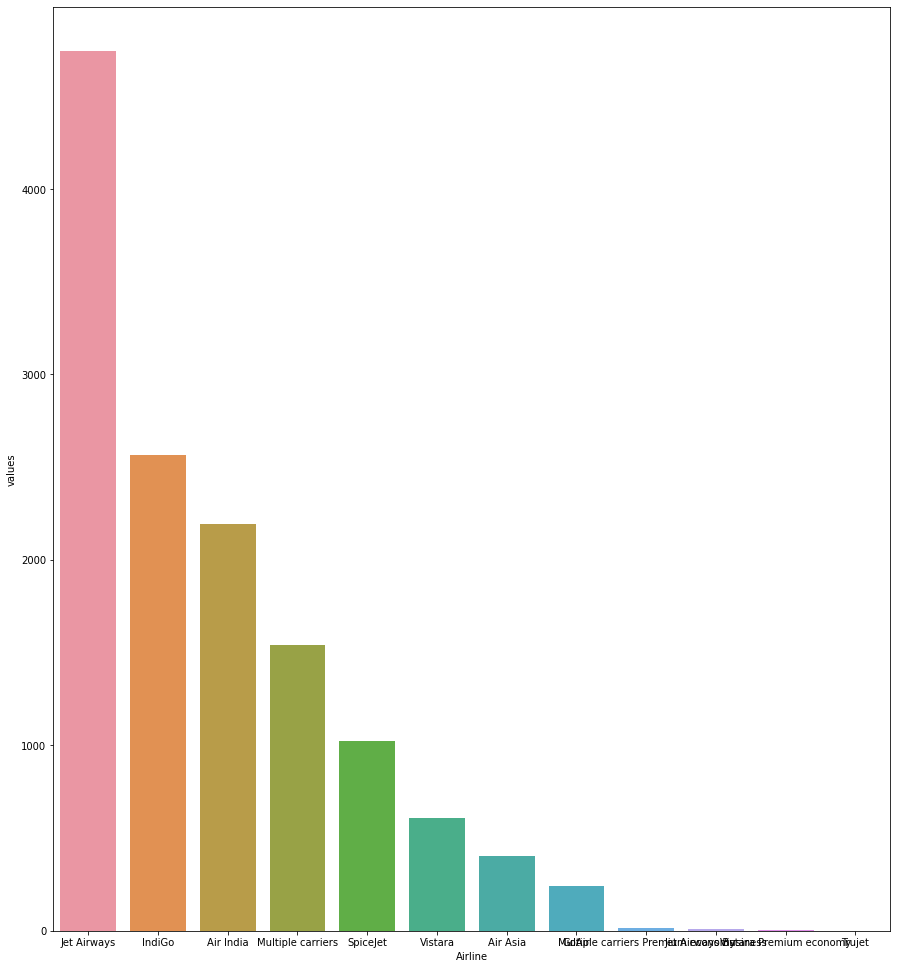

In [150]:
plt.figure(figsize=(15,17))
sns.barplot(df["Airline"].value_counts().keys(),df["Airline"].value_counts())
plt.xlabel("Airline")
plt.ylabel("values")
plt.show()
#jet airlines is maximum in number

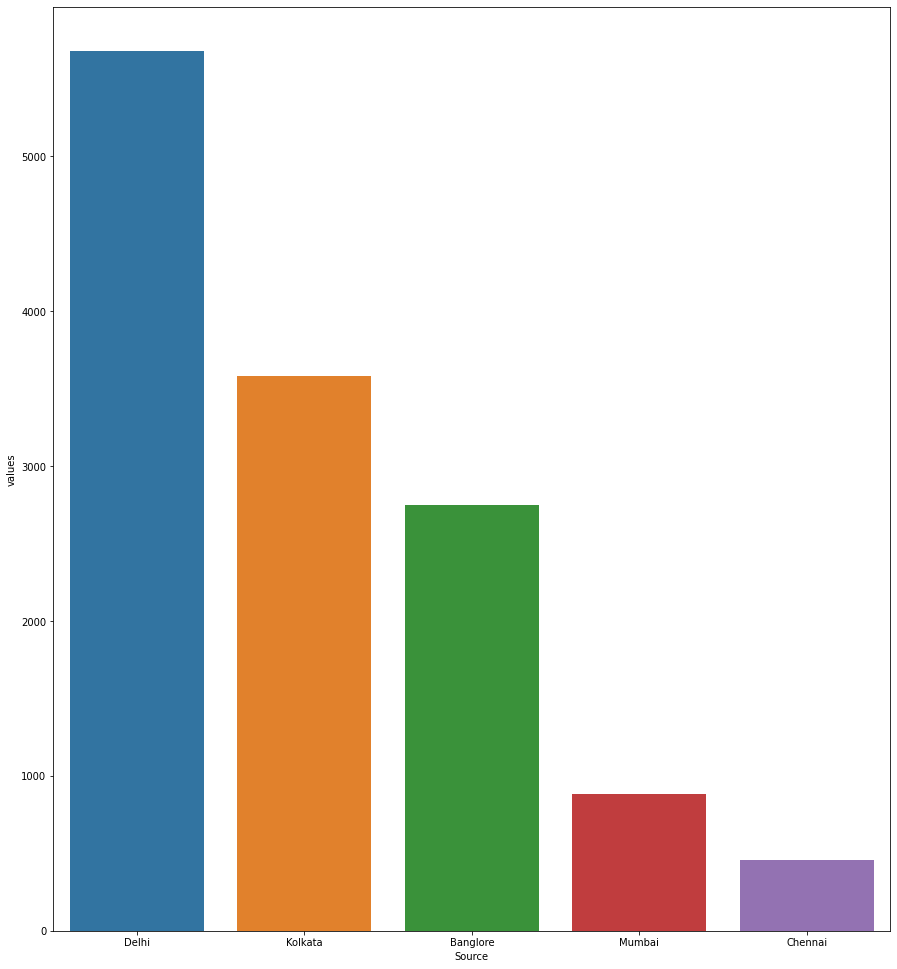

In [151]:
plt.figure(figsize=(15,17))
sns.barplot(df["Source"].value_counts().keys(),df["Source"].value_counts())
plt.xlabel("Source")
plt.ylabel("values")
plt.show()
#delhi is maximum in number

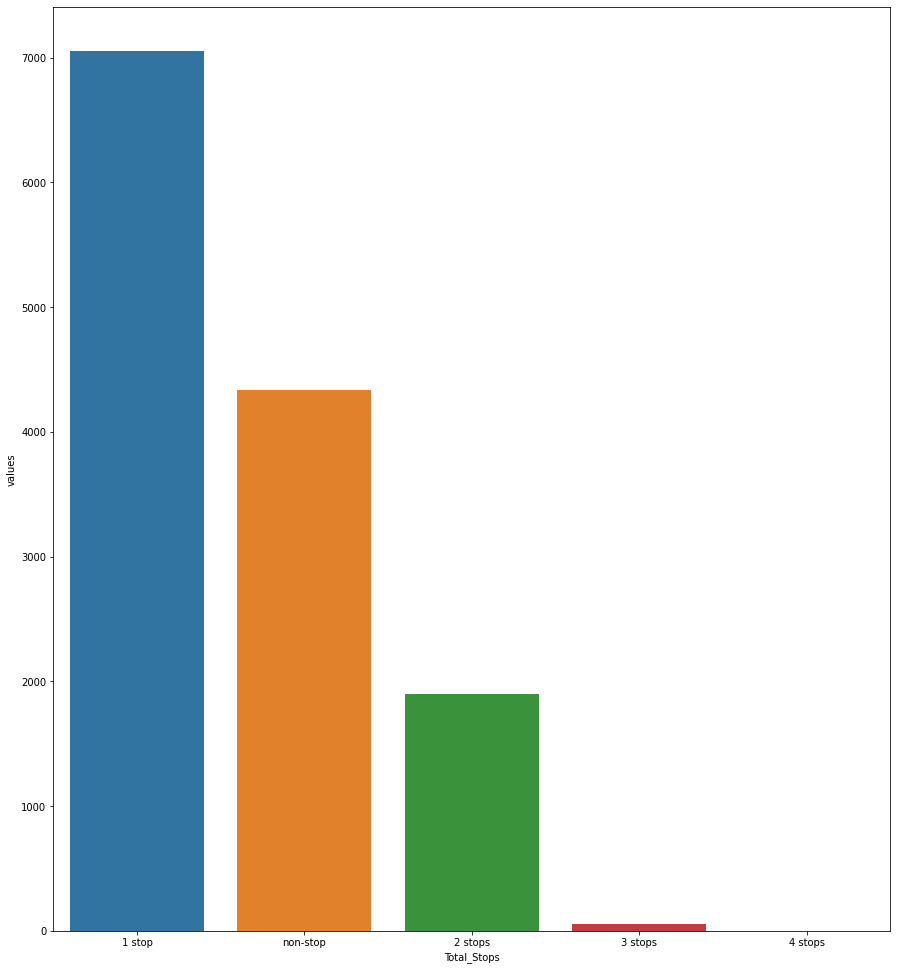

In [152]:
plt.figure(figsize=(15,17))
sns.barplot(df["Total_Stops"].value_counts().keys(),df["Total_Stops"].value_counts())
plt.xlabel("Total_Stops")
plt.ylabel("values")
plt.show()
#1stop maximum in number

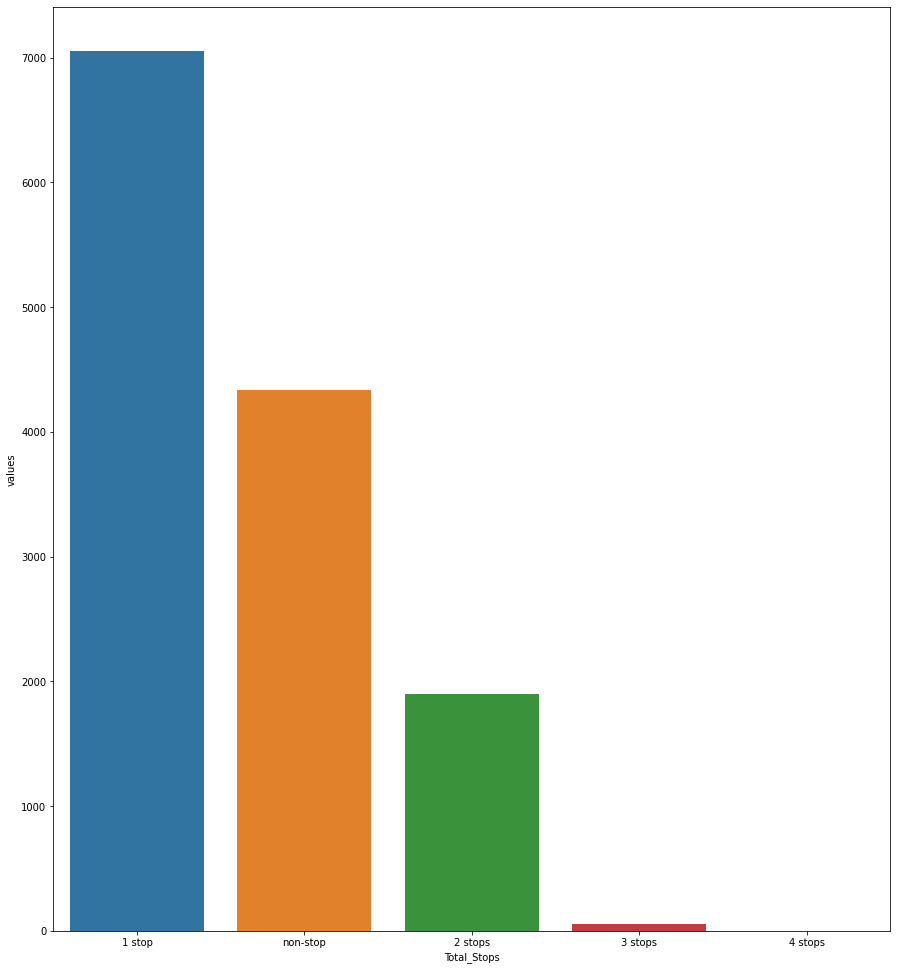

In [153]:
plt.figure(figsize=(15,17))
sns.barplot(df["Total_Stops"].value_counts().keys(),df["Total_Stops"].value_counts())
plt.xlabel("Total_Stops")
plt.ylabel("values")
plt.show()
#1stop is maximum in number

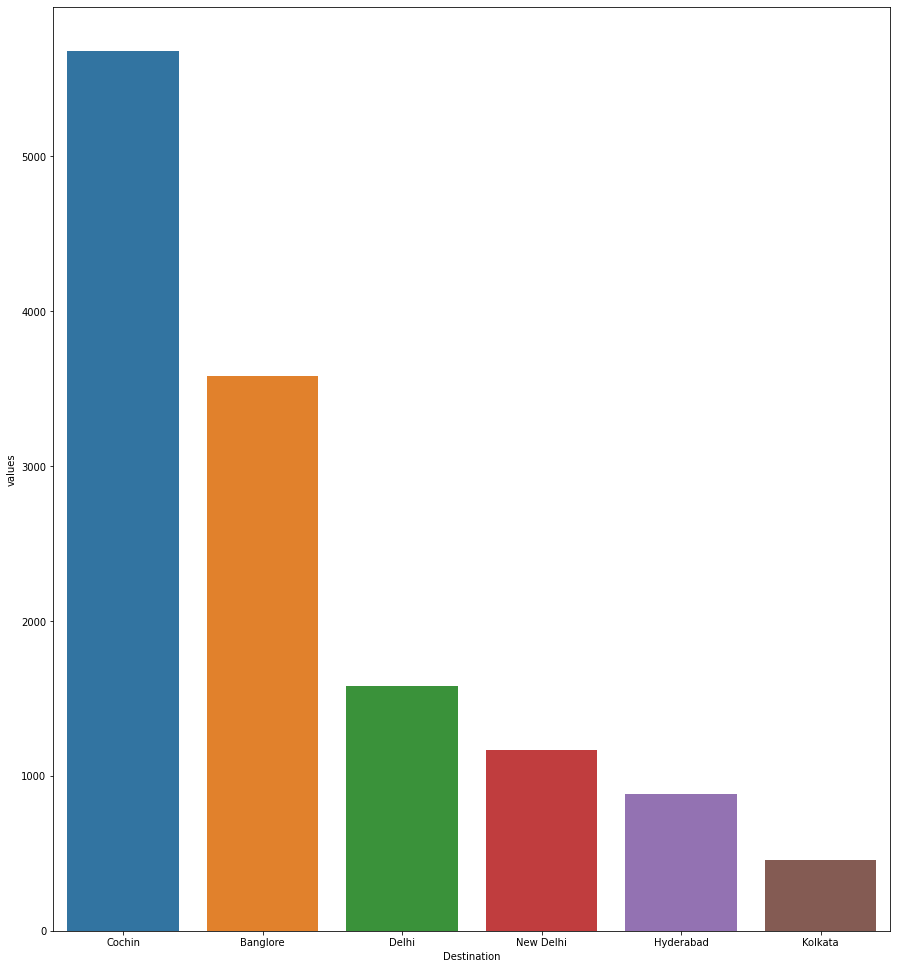

In [154]:
plt.figure(figsize=(15,17))
sns.barplot(df["Destination"].value_counts().keys(),df["Destination"].value_counts())
plt.xlabel("Destination")
plt.ylabel("values")
plt.show()

<AxesSubplot:xlabel='month', ylabel='Price'>

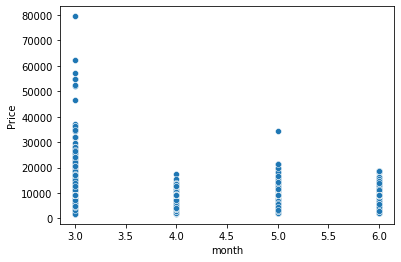

In [155]:
sns.scatterplot(x=df["month"],y=df["Price"])

<AxesSubplot:xlabel='year', ylabel='Price'>

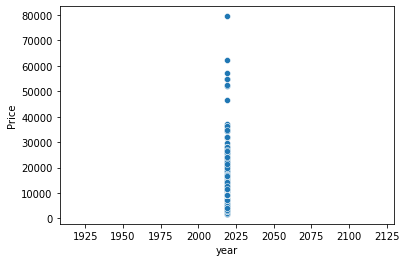

In [156]:
sns.scatterplot(x=df["year"],y=df["Price"])

<AxesSubplot:xlabel='Duration', ylabel='Price'>

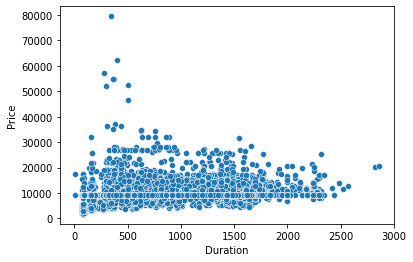

In [157]:
sns.scatterplot(x=df["Duration"],y=df["Price"])

<AxesSubplot:>

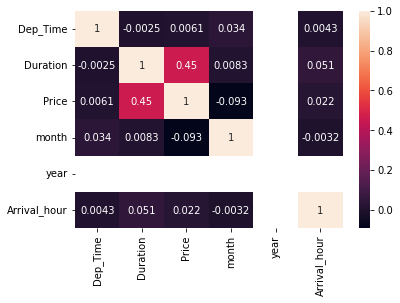

In [158]:
sns.heatmap(df.corr(),annot=True)
#from this graph no chance of multicolinaerity problem

In [159]:
#we can drop year since we have only one year 2019
df=df.drop(columns="year",axis=1)

In [160]:
df.describe()

,Dep_Time,Duration,Price,month,Arrival_hour
count,13354.000000,13354.00000,13354.000000,13354.000000,13354.000000
mean,12.513254,642.42287,9087.064121,4.710574,13.396061
std,5.736273,506.71504,4124.447805,1.165622,6.896145
min,0.000000,5.00000,1759.000000,3.000000,0.000000
25%,8.000000,175.00000,6135.250000,3.000000,8.000000
50%,11.000000,520.00000,9087.064121,5.000000,14.000000
75%,18.000000,930.00000,11087.000000,6.000000,19.000000
max,23.000000,2860.00000,79512.000000,6.000000,23.000000


In [161]:
#check for normal distribution
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 5 numerical variables

The numerical variables are : ['Dep_Time', 'Duration', 'Price', 'month', 'Arrival_hour']


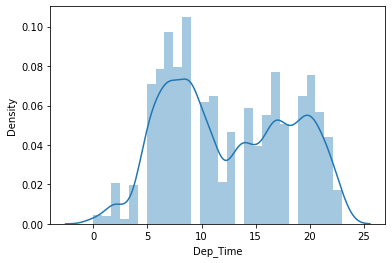

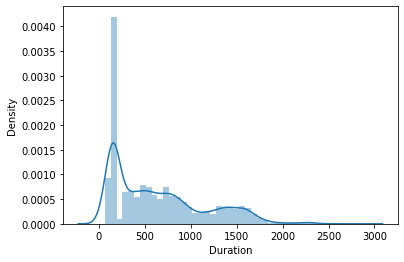

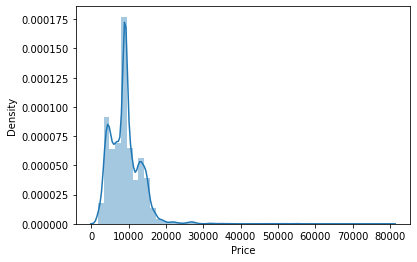

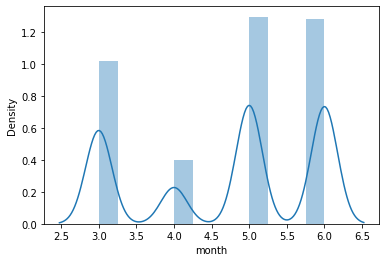

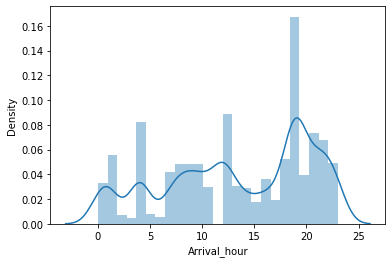

In [162]:
for i in numerical:
    sns.distplot(df[i])
  
    plt.show()
    #it is not normally distributed

In [163]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df.columns


Index(['Airline', 'Source', 'Destination', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Price', 'month', 'Arrival_hour'],
      dtype='object')

In [164]:
df["Airline"]=label.fit_transform(df["Airline"])
df["Total_Stops"]=label.fit_transform(df["Total_Stops"])
df["Source"]=label.fit_transform(df["Source"])
df["Destination"]=label.fit_transform(df["Destination"])
                                    

In [165]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 9 numerical variables

The numerical variables are : ['Airline', 'Source', 'Destination', 'Dep_Time', 'Duration', 'Total_Stops', 'Price', 'month', 'Arrival_hour']


In [166]:
df=df.drop(columns="Arrival_Time")

In [167]:
df.skew()
#no skewness is present. price is output so no need to remove skewness

Airline         0.720924
Source         -0.424151
Destination     1.247893
Dep_Time        0.109087
Duration        0.867883
Total_Stops     0.639492
Price           2.026457
month          -0.390684
Arrival_hour   -0.384591
dtype: float64

In [168]:
from scipy import stats

In [169]:
z=np.abs(stats.zscore(df))

In [170]:
df=df[(z<3).all(axis=1)]

In [172]:
df.shape

(13145, 9)

In [173]:
x=df.drop(columns="Price")
y=df["Price"]

In [174]:
y.shape

(13145,)

In [175]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=45,test_size=0.20,)

In [176]:
from sklearn.model_selection import train_test_split
from  sklearn.preprocessing import StandardScaler
lr=StandardScaler()
x=lr.fit_transform(x)

In [177]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [178]:
LR=LinearRegression()
LR=LR.fit(x_train,y_train)
y_Ptrain=LR.predict(x_train)
y_Ptest=LR.predict(x_test)
score1=r2_score(y_train,y_Ptrain)
score2=mean_absolute_error(y_train,y_Ptrain)
score3=mean_squared_error(y_train,y_Ptrain)
print(score1)
print(score2)
print(score3)

0.37429654124658096
2302.182057945121
8012293.027870891


In [180]:
print(score1)
print(score1)
print(score3)

0.37429654124658096
0.37429654124658096
8012293.027870891


In [181]:
from sklearn.model_selection import cross_val_score,GridSearchCV
trainscore=r2_score(y_Ptrain,y_train)
testscore=r2_score(y_test,y_Ptest)
for i in range(2,10):
    crossval=cross_val_score(LR,x_train,y_train,cv=i)
    cvmean=crossval.mean()
    print("At cv= {}, cross mean is {},and testscore={}".format(i,cvmean,testscore))

At cv= 2, cross mean is 0.37318207307128226,and testscore=0.3709167539073984
At cv= 3, cross mean is 0.3732857938250656,and testscore=0.3709167539073984
At cv= 4, cross mean is 0.3735900827885723,and testscore=0.3709167539073984
At cv= 5, cross mean is 0.3731012140314197,and testscore=0.3709167539073984
At cv= 6, cross mean is 0.373256890260332,and testscore=0.3709167539073984
At cv= 7, cross mean is 0.37308218804490906,and testscore=0.3709167539073984
At cv= 8, cross mean is 0.37324533069205407,and testscore=0.3709167539073984
At cv= 9, cross mean is 0.37234672890074566,and testscore=0.3709167539073984


In [182]:
from sklearn.linear_model import Lasso
ls=Lasso()
params = {'alpha': [0.001, 0.01, 0.1, 1, 10],'random_state':list(range(1,10))}
lsm = GridSearchCV(ls, params)

lsm.fit(x_train, y_train)

print(lsm.best_params_)
print(lsm.best_score_)

{'alpha': 10, 'random_state': 1}
0.3731350113547821


In [183]:
ls=Lasso(alpha=0.001,random_state=1)
lsm.fit(x_train,y_train)
y_pred=lsm.predict(x_test)
score=r2_score(y_test,y_pred)
score1=mean_absolute_error(y_test,y_pred)
score2=mean_squared_error(y_test,y_pred)
print(score)
print(score1)
print(score2)

0.37078664958538865
2320.6826851028895
8065027.058504818


In [184]:
crossvalue=cross_val_score(lsm,x_train,y_train,cv=9)
cvmean=crossvalue.mean()
cvmean

0.37234398729682927

In [185]:
from sklearn.ensemble import RandomForestRegressor
rm=RandomForestRegressor()
import warnings
warnings.filterwarnings("ignore")
para={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rmg=GridSearchCV(rm,para)
rmg.fit(x_train,y_train)
rmg.best_params_

{'criterion': 'mae', 'max_features': 'sqrt'}

In [ ]:
crossvalue=cross_val_score(rmg,x_train,y_train,cv=9)
crossmean=crossvalue.mean()
print(crossmean)

In [186]:
from sklearn.neighbors import KNeighborsRegressor
kn=KNeighborsRegressor()
kn.fit(x_train, y_train)
pred=kn.predict(x_test)
score=r2_score(y_test,pred)
score

0.4938206854277716

In [187]:
crossval=cross_val_score(kn,x_train,y_train,cv=2)
cvmean=crossval.mean()
cvmean

0.482941107739815

In [ ]:
#random forest gives better result
import pickle
file_name="Global power"
pickle.dump(rmg,open(file_name,"wb")